**Author:** Taiga Schwarz  
**Date Created:** 2/17/21  

# <center>Digit Recognizer Project: <br> Data Visualization</center> 


## Project Overview:  

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this project, my goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. It is worth noting that this is a knowledge-oriented project from Kaggle, which has a curated a set of tutorial-style kernels that cover everything from regression to neural networks.

### Import Packages:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data Set:

In [2]:
train_df = pd.read_csv("digit-recognizer-data/train.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(42000, 785)

In [5]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
# check to see if any null values exist
train_df.isnull().values.any()

False

**Questions:**
- What do the pixel values mean?
    - **Each image is 28 x 28 pixels for a total of 784 pixels. Each pixel is assigned an integer value within the interval \[0, 255\] indicating its level of darkness, where higher values correspond to higher levels of darkness.**
     
    <br>
    
- Are there any null values? (most likely not for this data set but good practice to check)
    - **No, there are no null values.**
    
    <br>
    
- What are the columns? What are the rows?
    - **The "label" column is the digit drawn by the user. The other columns contain the pixel-values of the associated image.**
    - **Each row is associated with an image.**

In [38]:
# create an array containing 28x28 subarrays for each image
images = train_df.loc[:, train_df.columns != "label"].values.reshape([42000, 28, 28])

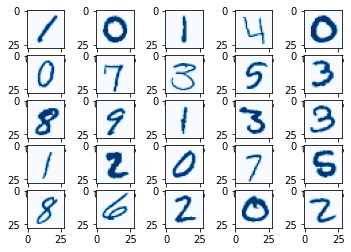

In [41]:
# plot the images 
n_rows, n_cols = 5, 5
fig, ax = plt.subplots(n_rows, n_cols)
counter = 0

for i in range(n_rows*n_cols):
    y_pos = counter // n_rows
    x_pos = counter % n_cols
    ax[y_pos][x_pos].imshow(images[counter], cmap = "Blues") 
    counter += 1